--
Insert Nessesarry Modules

In [109]:
!pip3 install folium
!pip3 install pandas
!pip3 install Numpy
!pip3 install seaborn
!pip3 install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [110]:
#Pandas is module for working in a dataset
#have function to clean, transform, and analyze data
import pandas as pd

#Numpy is module for working with arrays and scientific computing
import numpy as np

#Matplotlib is module for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

#Seaborn is module for creating statistical graphics
import seaborn as sns

from sklearn.datasets import fetch_california_housing
#visualization for geospatial data
import folium


In [111]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.DESCR)

(20640, 8) (20640,)
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, 

In [112]:
# Fetch California Housing dataset
california = fetch_california_housing()

# Create DataFrame with features
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add target variable
df['MedHouseVal'] = california.target

print(f"Dataset loaded! Shape: {df.shape}")


Dataset loaded! Shape: (20640, 9)


# Describe our Dataframe before we insert data

In [113]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Check total missing values per column

In [114]:
print(df.isna().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


| Column Name   | Description            |
|--------------|------------------------|
| MedInc       | Median Income          |
| HouseAge     | House Age              |
| AveRooms     | Average Rooms          |
| AveBedrms    | Average Bedrooms       |
| Population   | Population             |
| AveOccup     | Average Occupancy      |
| Latitude     | Latitude               |
| Longitude    | Longitude              |
| MedHouseVal  | Median House Value     |


# Plot all our Features

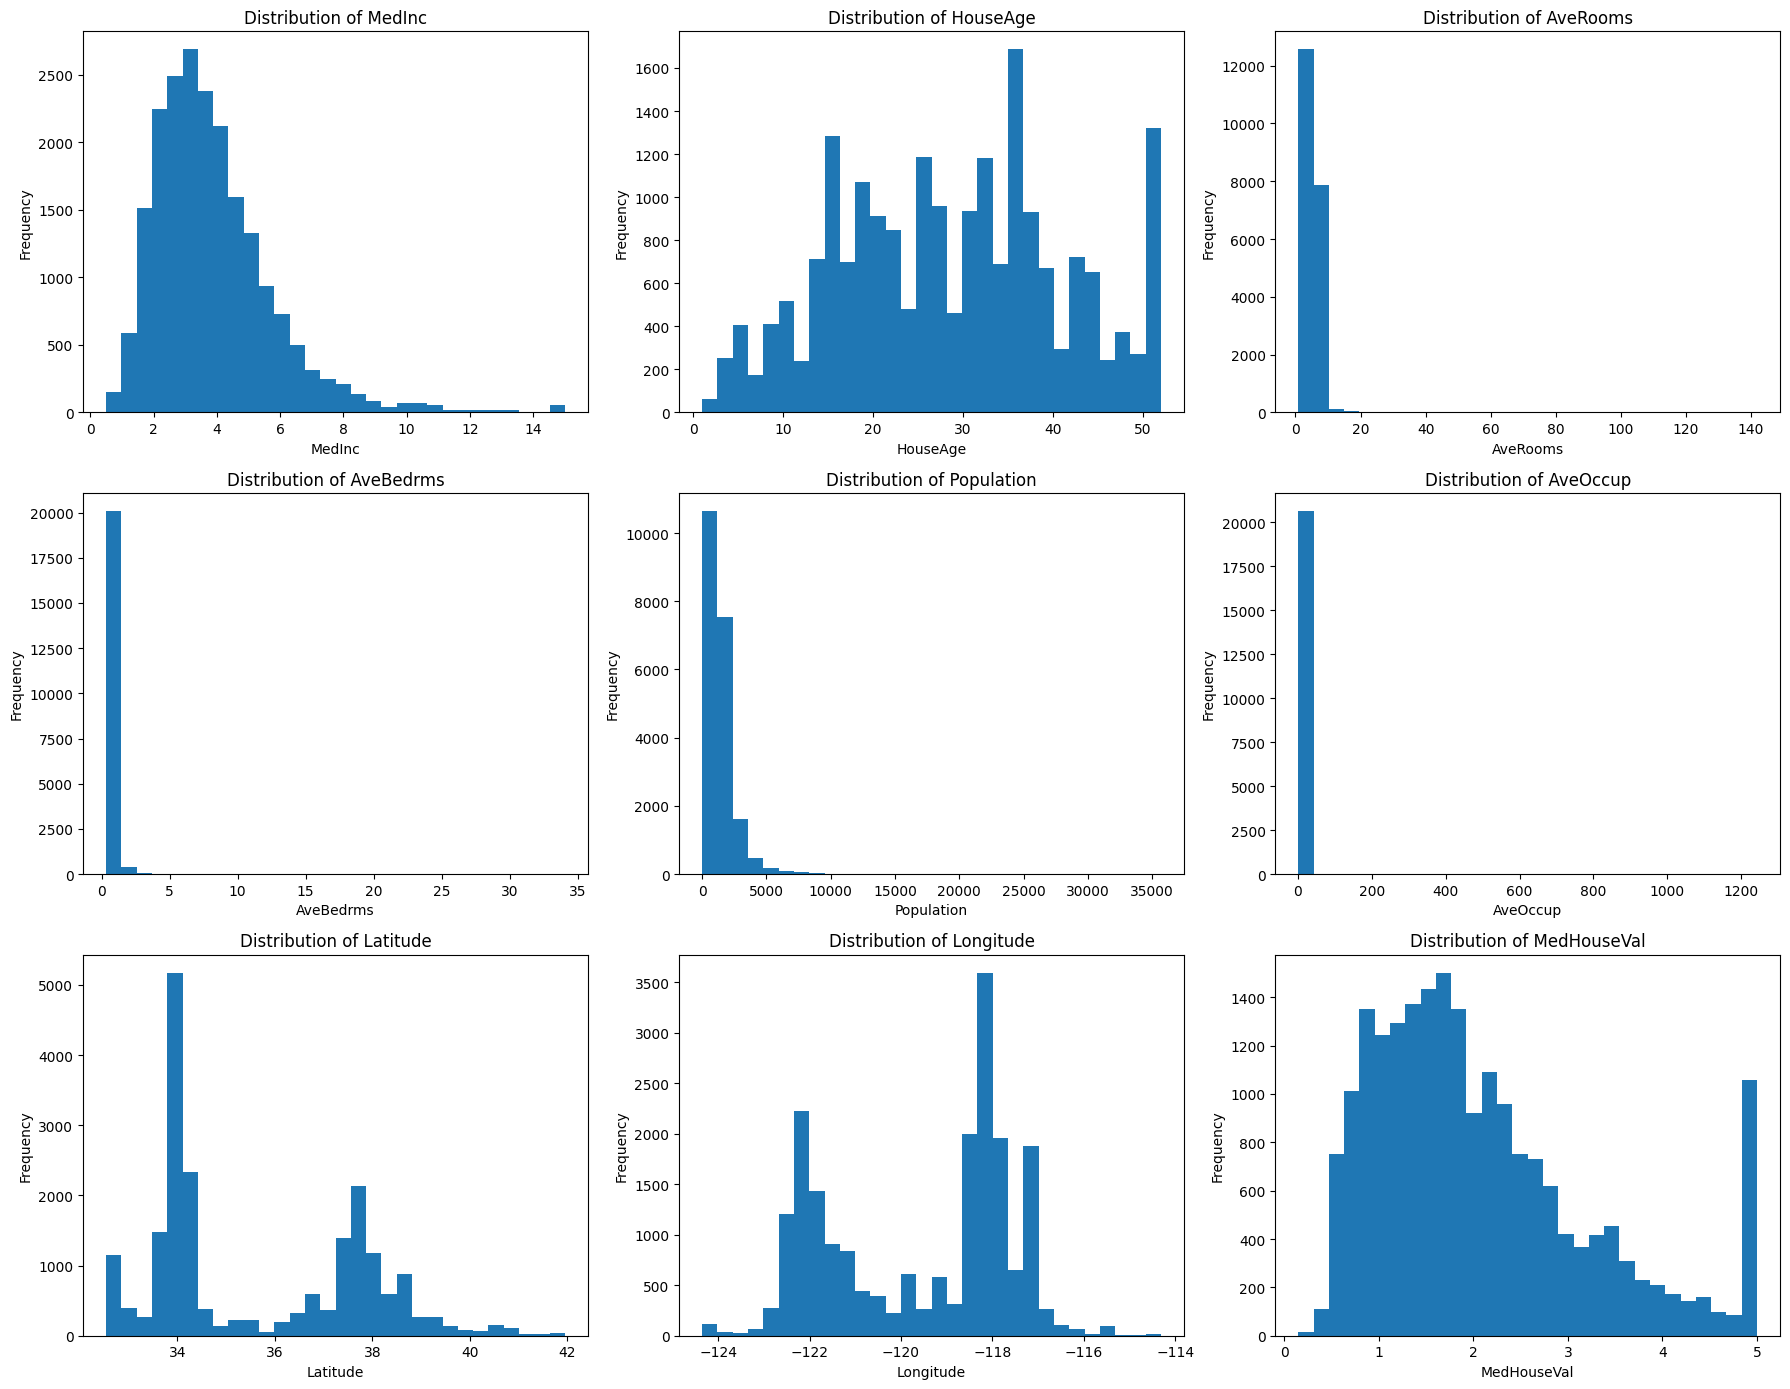

In [115]:
features = [
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
    'Population', 'AveOccup', 'Latitude', 'Longitude',
    'MedHouseVal'
]


fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create New Description to Make it more Understandable

In [116]:
# 1. House Age Group
df['age_group_house'] = pd.cut(
    df['HouseAge'],
    bins=[0, 10, 20, 30, 40, 52],
    labels=[
        'Very New (0–10)',
        'New (11–20)',
        'Mid-Age (21–30)',
        'Old (31–40)',
        'Very Old (41–52)'
    ]
)

# 2. Price Category (target grouping)
df['price_category'] = pd.cut(df['MedHouseVal'],
                              bins=[0, 1.5, 3, 5.1],
                              labels=['Affordable', 'Moderate', 'Expensive'])

# 3. Location Type (Coastal vs Inland)
df['location_type'] = df['Longitude'].apply(
    lambda x: 'Coastal' if x < -121 else 'Inland')

# 4. Population Density
df['density'] = pd.cut(
    df['Population'],
    bins=[0, 500, 1500, 40000],
    labels=[
        'Low (0–500 people)',       
        'Medium (501–1,500 people)',
        'High (1,501–40,000 people)'
    ]
)
# 5. Room Size Category (Average Rooms per House)
df['room_size'] = pd.cut(
    df['AveRooms'],
    bins=[0, 4, 6, 8, 150],
    labels=[
        'Small (0–4 rooms)',       # tiny houses or apartments
        'Medium (5–6 rooms)',      # average family house
        'Large (7–8 rooms)',       # spacious houses
        'Very Large (9+ rooms)'    # mansions or very large homes
    ]
)

# 6. Occupancy Level (Average Persons per Household)
df['occupancy_level'] = pd.cut(
    df['AveOccup'],
    bins=[0, 2, 4, 1500],
    labels=[
        'Low (0–2 people)',        # small households
        'Normal (3–4 people)',     # typical households
        'Crowded (5+ people)'      # very crowded homes
    ]
)

# 7. California Region (using Latitude)
df['region'] = pd.cut(df['Latitude'],
                      bins=[32, 35, 37, 42],
                      labels=['SoCal', 'Central', 'NorCal'])

df['income_group'] = pd.cut(df['MedInc'],
                            bins=[0, 4, 8, 12, df['MedInc'].max()],
                            labels=[
                                "Low (<$40k)",
                                "Middle ($40k–$80k)",
                                "Upper-Middle ($80k–$120k)",
                                "Rich (≥$120k)"
                            ])

In [117]:
def classify_location(row):
    lat, lon = row['Latitude'], row['Longitude']
    # More granular coastal boundary that follows California's curved coastline
    if lat > 41:          # Far NorCal (Eureka area)
        threshold = -123.5
    elif lat > 39:        # NorCal (Mendocino to north of SF)
        threshold = -122.5
    elif lat > 37.5:      # SF Bay Area
        threshold = -122
    elif lat > 36:        # Monterey/Big Sur area
        threshold = -121
    elif lat > 35:        # San Luis Obispo area
        threshold = -120
    elif lat > 34:        # Santa Barbara to LA
        threshold = -118.5
    else:                 # SoCal (LA to San Diego)
        threshold = -117
    return 'Coastal' if lon < threshold else 'Inland'

df['location_type'] = df.apply(classify_location, axis=1)

# Check new Whats on our Data Frame

In [118]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,age_group_house,price_category,location_type,density,room_size,occupancy_level,region,income_group
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Very Old (41–52),Expensive,Coastal,Low (0–500 people),Large (7–8 rooms),Normal (3–4 people),NorCal,Upper-Middle ($80k–$120k)
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Mid-Age (21–30),Expensive,Coastal,"High (1,501–40,000 people)",Large (7–8 rooms),Normal (3–4 people),NorCal,Upper-Middle ($80k–$120k)
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Very Old (41–52),Expensive,Coastal,Low (0–500 people),Very Large (9+ rooms),Normal (3–4 people),NorCal,Middle ($40k–$80k)
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Very Old (41–52),Expensive,Coastal,"Medium (501–1,500 people)",Medium (5–6 rooms),Normal (3–4 people),NorCal,Middle ($40k–$80k)
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Very Old (41–52),Expensive,Coastal,"Medium (501–1,500 people)",Large (7–8 rooms),Normal (3–4 people),NorCal,Low (<$40k)


# Population Density by Median Income

C:\Users\francis\AppData\Local\Temp\ipykernel_18196\3412822832.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  population_density = df.groupby('density')['MedInc'].mean().reset_index().sort_values(by='MedInc')


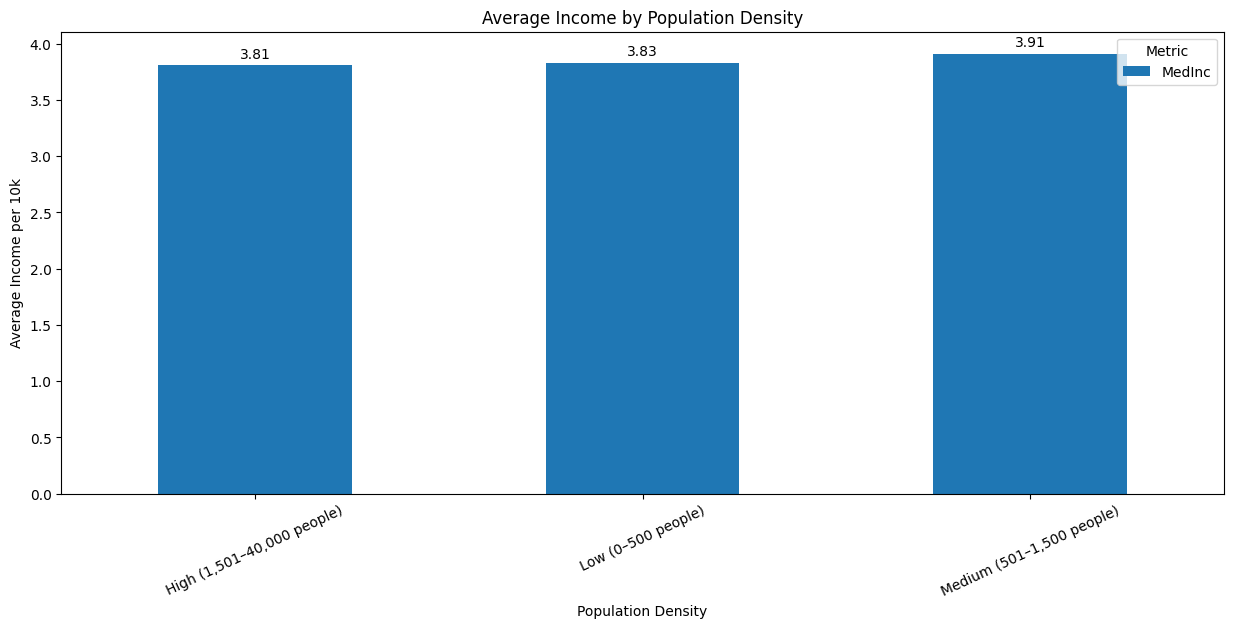

In [119]:
population_density = df.groupby('density')['MedInc'].mean().reset_index().sort_values(by='MedInc')
population_density

ax = population_density.plot(
    x='density',
    y='MedInc',
    kind='bar',
    figsize=(15, 6)
)

plt.title('Average Income by Population Density')
plt.xlabel('Population Density')
plt.ylabel('Average Income per 10k')
plt.xticks(rotation=25)
plt.legend(title='Metric')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.show()

C:\Users\francis\AppData\Local\Temp\ipykernel_18196\3288174852.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  home_price = df.groupby('price_category')[['AveRooms','AveBedrms']].mean().reset_index().sort_values(by='AveRooms')


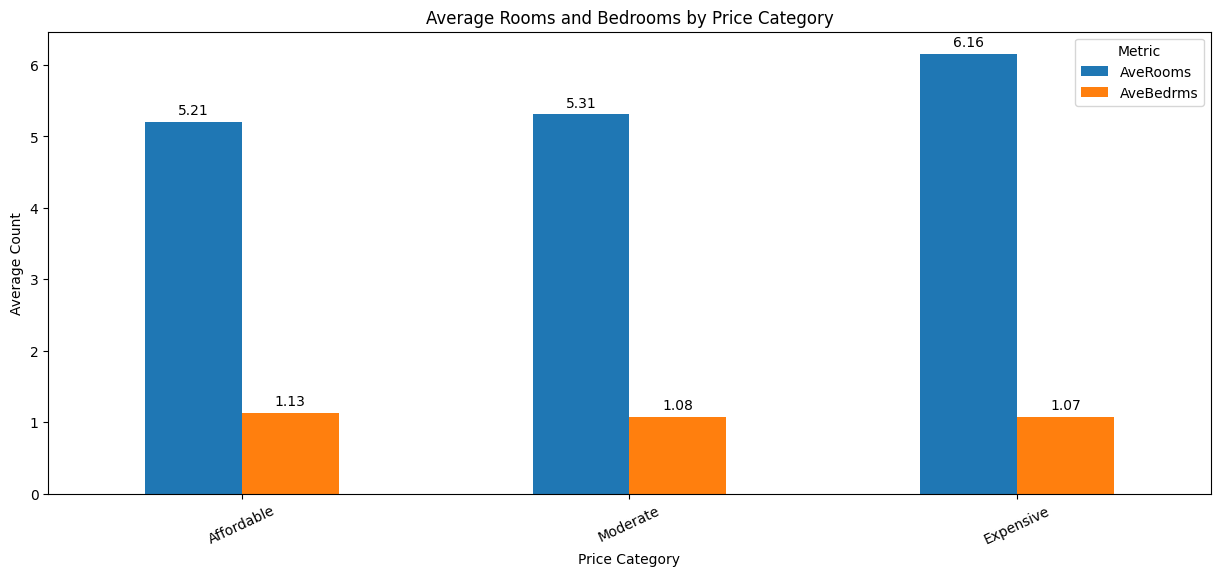

In [120]:
home_price = df.groupby('price_category')[['AveRooms','AveBedrms']].mean().reset_index().sort_values(by='AveRooms')
home_price

ax = home_price.plot(
    x='price_category',
    y=['AveRooms', 'AveBedrms'],
    kind='bar',
    figsize=(15, 6)
)

plt.title('Average Rooms and Bedrooms by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Count')
plt.xticks(rotation=25)
plt.legend(title='Metric')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.show()



# Average Number of Rooms and Bedrooms per Location Type

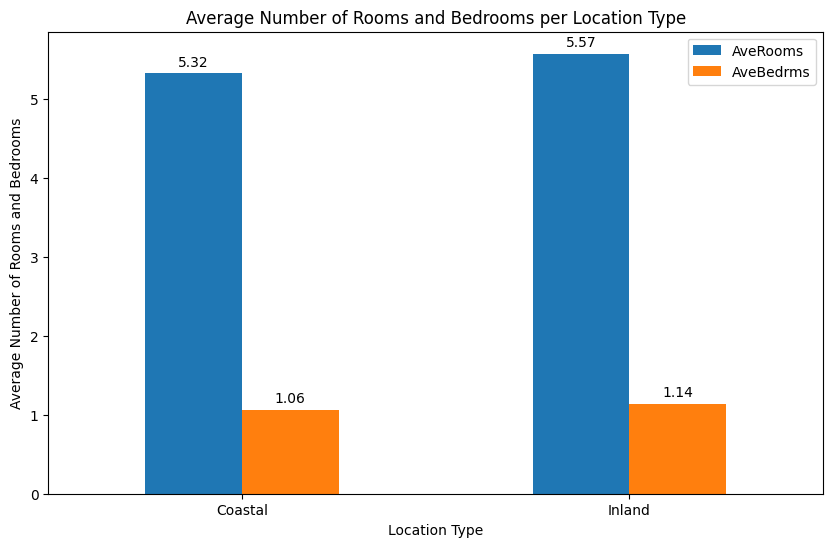

In [121]:
AveRoom_per_location_type = (
    df.groupby('location_type')[['AveRooms', 'AveBedrms']]
    .mean()
    .round(2)
)

ax = AveRoom_per_location_type.plot(kind='bar', figsize=(10,6))

plt.title('Average Number of Rooms and Bedrooms per Location Type')
plt.xlabel('Location Type')
plt.ylabel('Average Number of Rooms and Bedrooms')
plt.xticks(rotation=0)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.show()

# Distribution of House Age

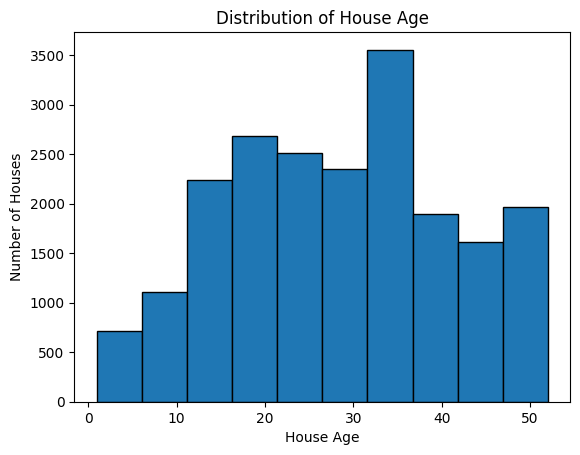

In [122]:
plt.hist(df['HouseAge'], bins=10, edgecolor='black')
plt.xlabel('House Age')
plt.ylabel('Number of Houses')
plt.title('Distribution of House Age')


plt.show()

# Average Home Price per 100,000

C:\Users\francis\AppData\Local\Temp\ipykernel_18196\2390508674.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  home_price = df.groupby('age_group_house')['MedHouseVal'].mean().reset_index().sort_values(by='MedHouseVal')


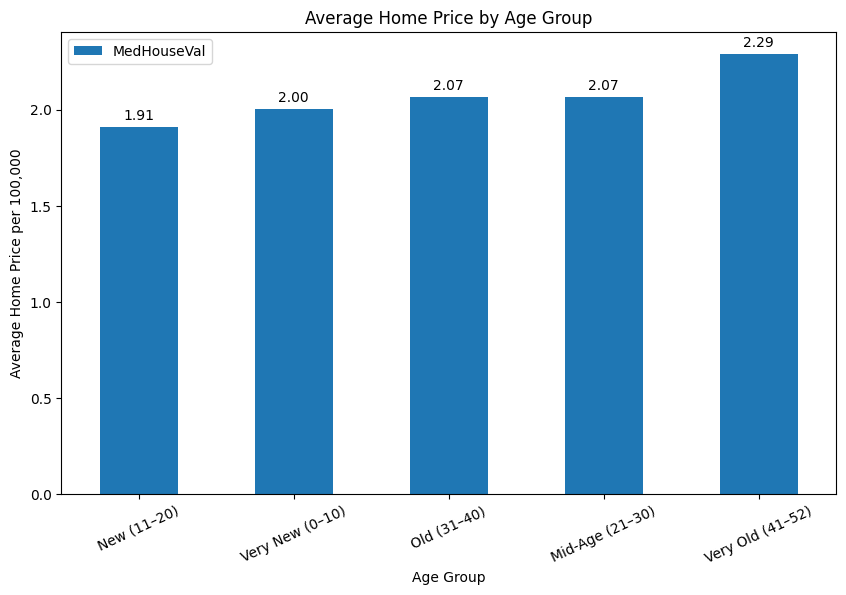

In [123]:
home_price = df.groupby('age_group_house')['MedHouseVal'].mean().reset_index().sort_values(by='MedHouseVal')
home_price

ax = home_price.plot(x='age_group_house', y='MedHouseVal', kind='bar', figsize=(10, 6))
plt.title('Average Home Price by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=25)
plt.ylabel('Average Home Price per 100,000')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.show()


# Average Rooms and Bedrooms by Price Category

C:\Users\francis\AppData\Local\Temp\ipykernel_18196\3288174852.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  home_price = df.groupby('price_category')[['AveRooms','AveBedrms']].mean().reset_index().sort_values(by='AveRooms')


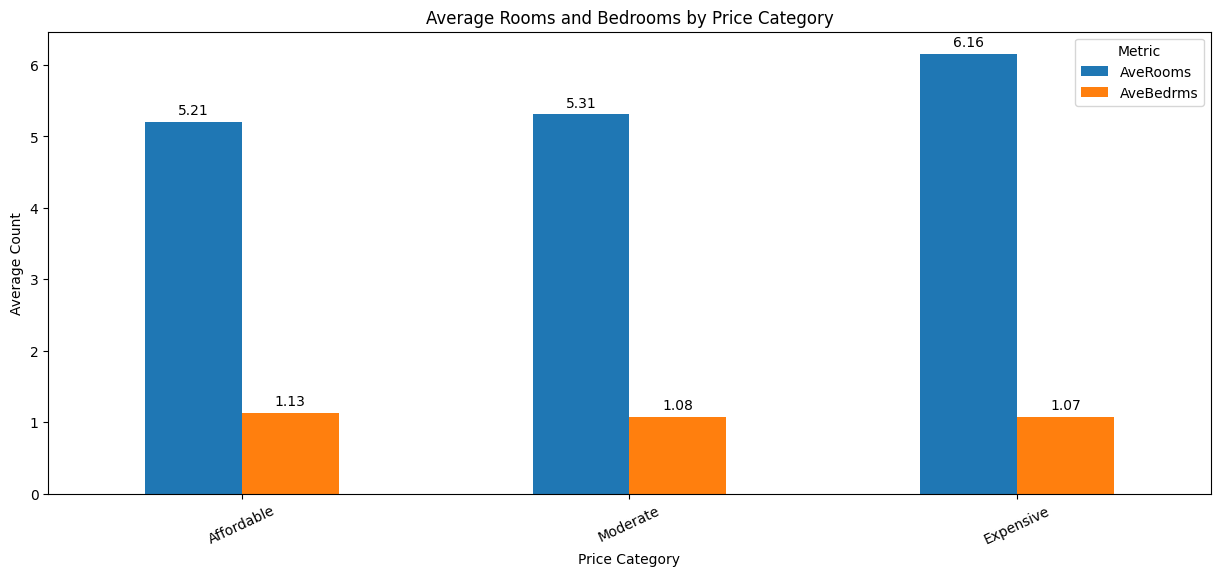

In [124]:
home_price = df.groupby('price_category')[['AveRooms','AveBedrms']].mean().reset_index().sort_values(by='AveRooms')
home_price

ax = home_price.plot(
    x='price_category',
    y=['AveRooms', 'AveBedrms'],
    kind='bar',
    figsize=(15, 6)
)

plt.title('Average Rooms and Bedrooms by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Count')
plt.xticks(rotation=25)
plt.legend(title='Metric')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.show()



# Income Group (Median Household Income)

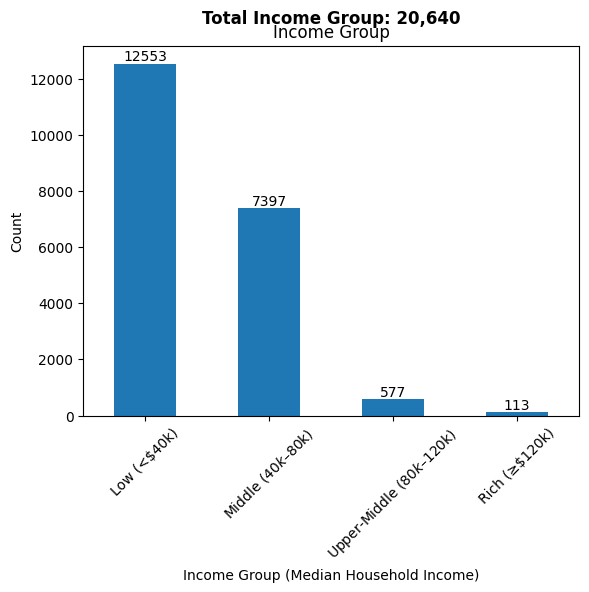

In [125]:
income_group_count = df["income_group"].value_counts().sort_index()
income_group_total = df['income_group'].count()

ax = income_group_count.plot(kind="bar")

plt.xlabel("Income Group (Median Household Income)")
plt.ylabel("Count")
plt.title("Income Group")
plt.xticks(rotation=45)


for i, value in enumerate(income_group_count):
    ax.text(i, value, str(value), ha="center", va="bottom")

# Add total population text above the chart
plt.text(
    0.5,                   
    1.05,                  
    f"Total Income Group: {int(income_group_total):,}", 
    ha="center", 
    va="bottom", 
    transform=ax.transAxes, 
    fontsize=12,
    fontweight="bold"
)



plt.show()

# Population by Income Group

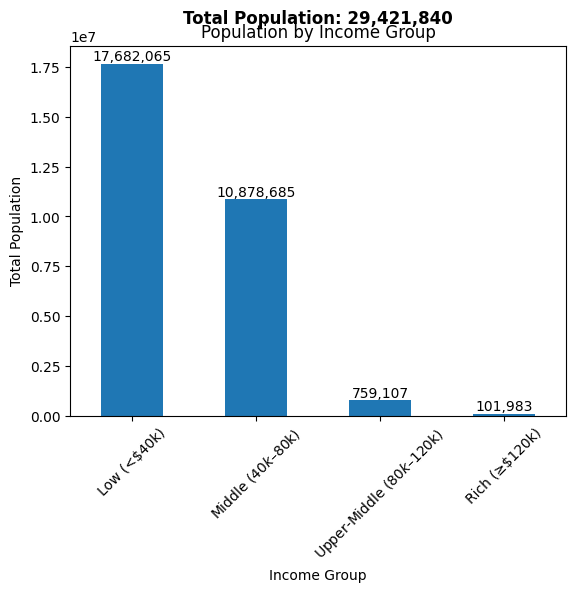

In [126]:


total_population = df["Population"].sum()

population_income_group = (
    df.groupby("income_group", observed=True)["Population"]
      .sum()
      .sort_index()
)

ax = population_income_group.plot(kind="bar")

plt.xlabel("Income Group")
plt.ylabel("Total Population")
plt.xticks(rotation=45)
plt.title("Population by Income Group")


for i, value in enumerate(population_income_group):
    ax.text(i, value, f"{int(value):,}", ha="center", va="bottom")

plt.text(
    0.5,                    
    1.05,                  
    f"Total Population: {int(total_population):,}", 
    ha="center", 
    va="bottom", 
    transform=ax.transAxes, 
    fontsize=12,
    fontweight="bold"
)

plt.show()

# HOUSE PRICES (Median House Value)

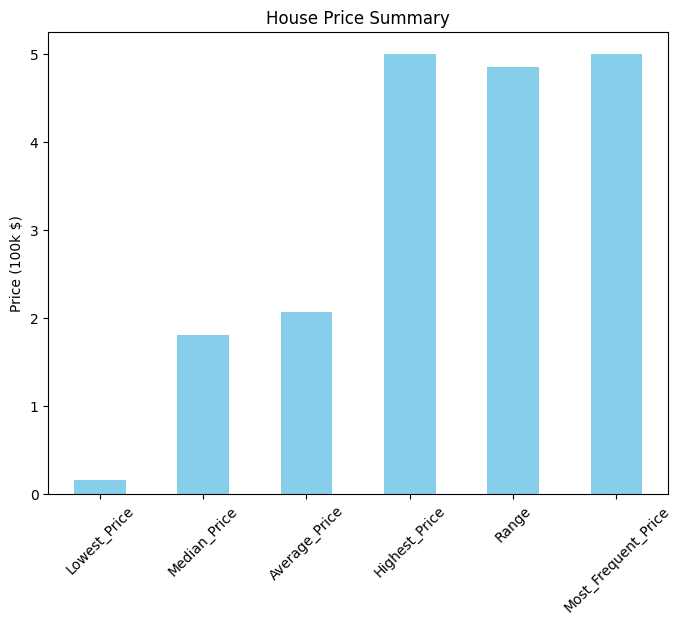

HOUSE PRICES (Median House Value):
• Average Price: $206.86k
• Median Price: $179.70k
• Lowest Price: $15.00k
• Highest Price: $500.00k
• Price Range: $485.00k
• Most Frequent Price: $500.00k


In [127]:
# ------------------------------
# 1. Aggregate summary
# ------------------------------
house_price_summary = df['MedHouseVal'].agg({
    'Average_Price': 'mean',
    'Median_Price': 'median',
    'Lowest_Price': 'min',
    'Highest_Price': 'max'
}).sort_values()

# Add range
house_price_summary['Range'] = house_price_summary['Highest_Price'] - house_price_summary['Lowest_Price']

# Add mode
house_price_summary['Most_Frequent_Price'] = df['MedHouseVal'].mode()[0]

# ------------------------------
# 2. Plot summary (in $100k)
# ------------------------------
house_price_summary.plot(kind='bar', color='skyblue', figsize=(8,6))
plt.ylabel('Price (100k $)')
plt.title('House Price Summary')
plt.xticks(rotation=45)
plt.show()

# ------------------------------
# 3. Print nicely (already in 100k units)
# ------------------------------
house_price_summary_100k =house_price_summary * 100

print("HOUSE PRICES (Median House Value):")
print(f"• Average Price: ${house_price_summary_100k['Average_Price']:.2f}k")
print(f"• Median Price: ${house_price_summary_100k['Median_Price']:.2f}k")
print(f"• Lowest Price: ${house_price_summary_100k['Lowest_Price']:.2f}k")
print(f"• Highest Price: ${house_price_summary_100k['Highest_Price']:.2f}k")
print(f"• Price Range: ${house_price_summary_100k['Range']:.2f}k")
print(f"• Most Frequent Price: ${house_price_summary_100k['Most_Frequent_Price']:.2f}k")

# Average Home Price: Coastal vs Inland

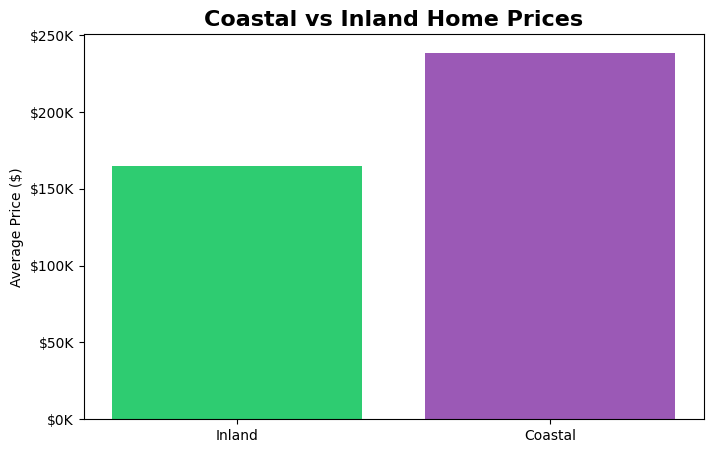

Average Home Price: Coastal vs Inland
  location_type MedHouseVal
0        Inland    $165,053
1       Coastal    $238,647


In [128]:

# 3. Simple Comparison Bar - Location Type
loc_avg = df.groupby('location_type')['MedHouseVal'].mean().sort_values()

plt.figure(figsize=(8, 5))
# Multiply by 100000 for actual dollar values
plt.bar(loc_avg.index, loc_avg.values * 100000, color=['#2ecc71', '#9b59b6'])
plt.title('Coastal vs Inland Home Prices', fontsize=16, fontweight='bold')
plt.ylabel('Average Price ($)')

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:,.0f}K'))

plt.show()

# Print the values in actual dollars
print('Average Home Price: Coastal vs Inland')
result = loc_avg.reset_index()
result['MedHouseVal'] = result['MedHouseVal'] * 100000
result['MedHouseVal'] = result['MedHouseVal'].apply(lambda x: f'${x:,.0f}')
print(result)


# Distribution of Housing Categories

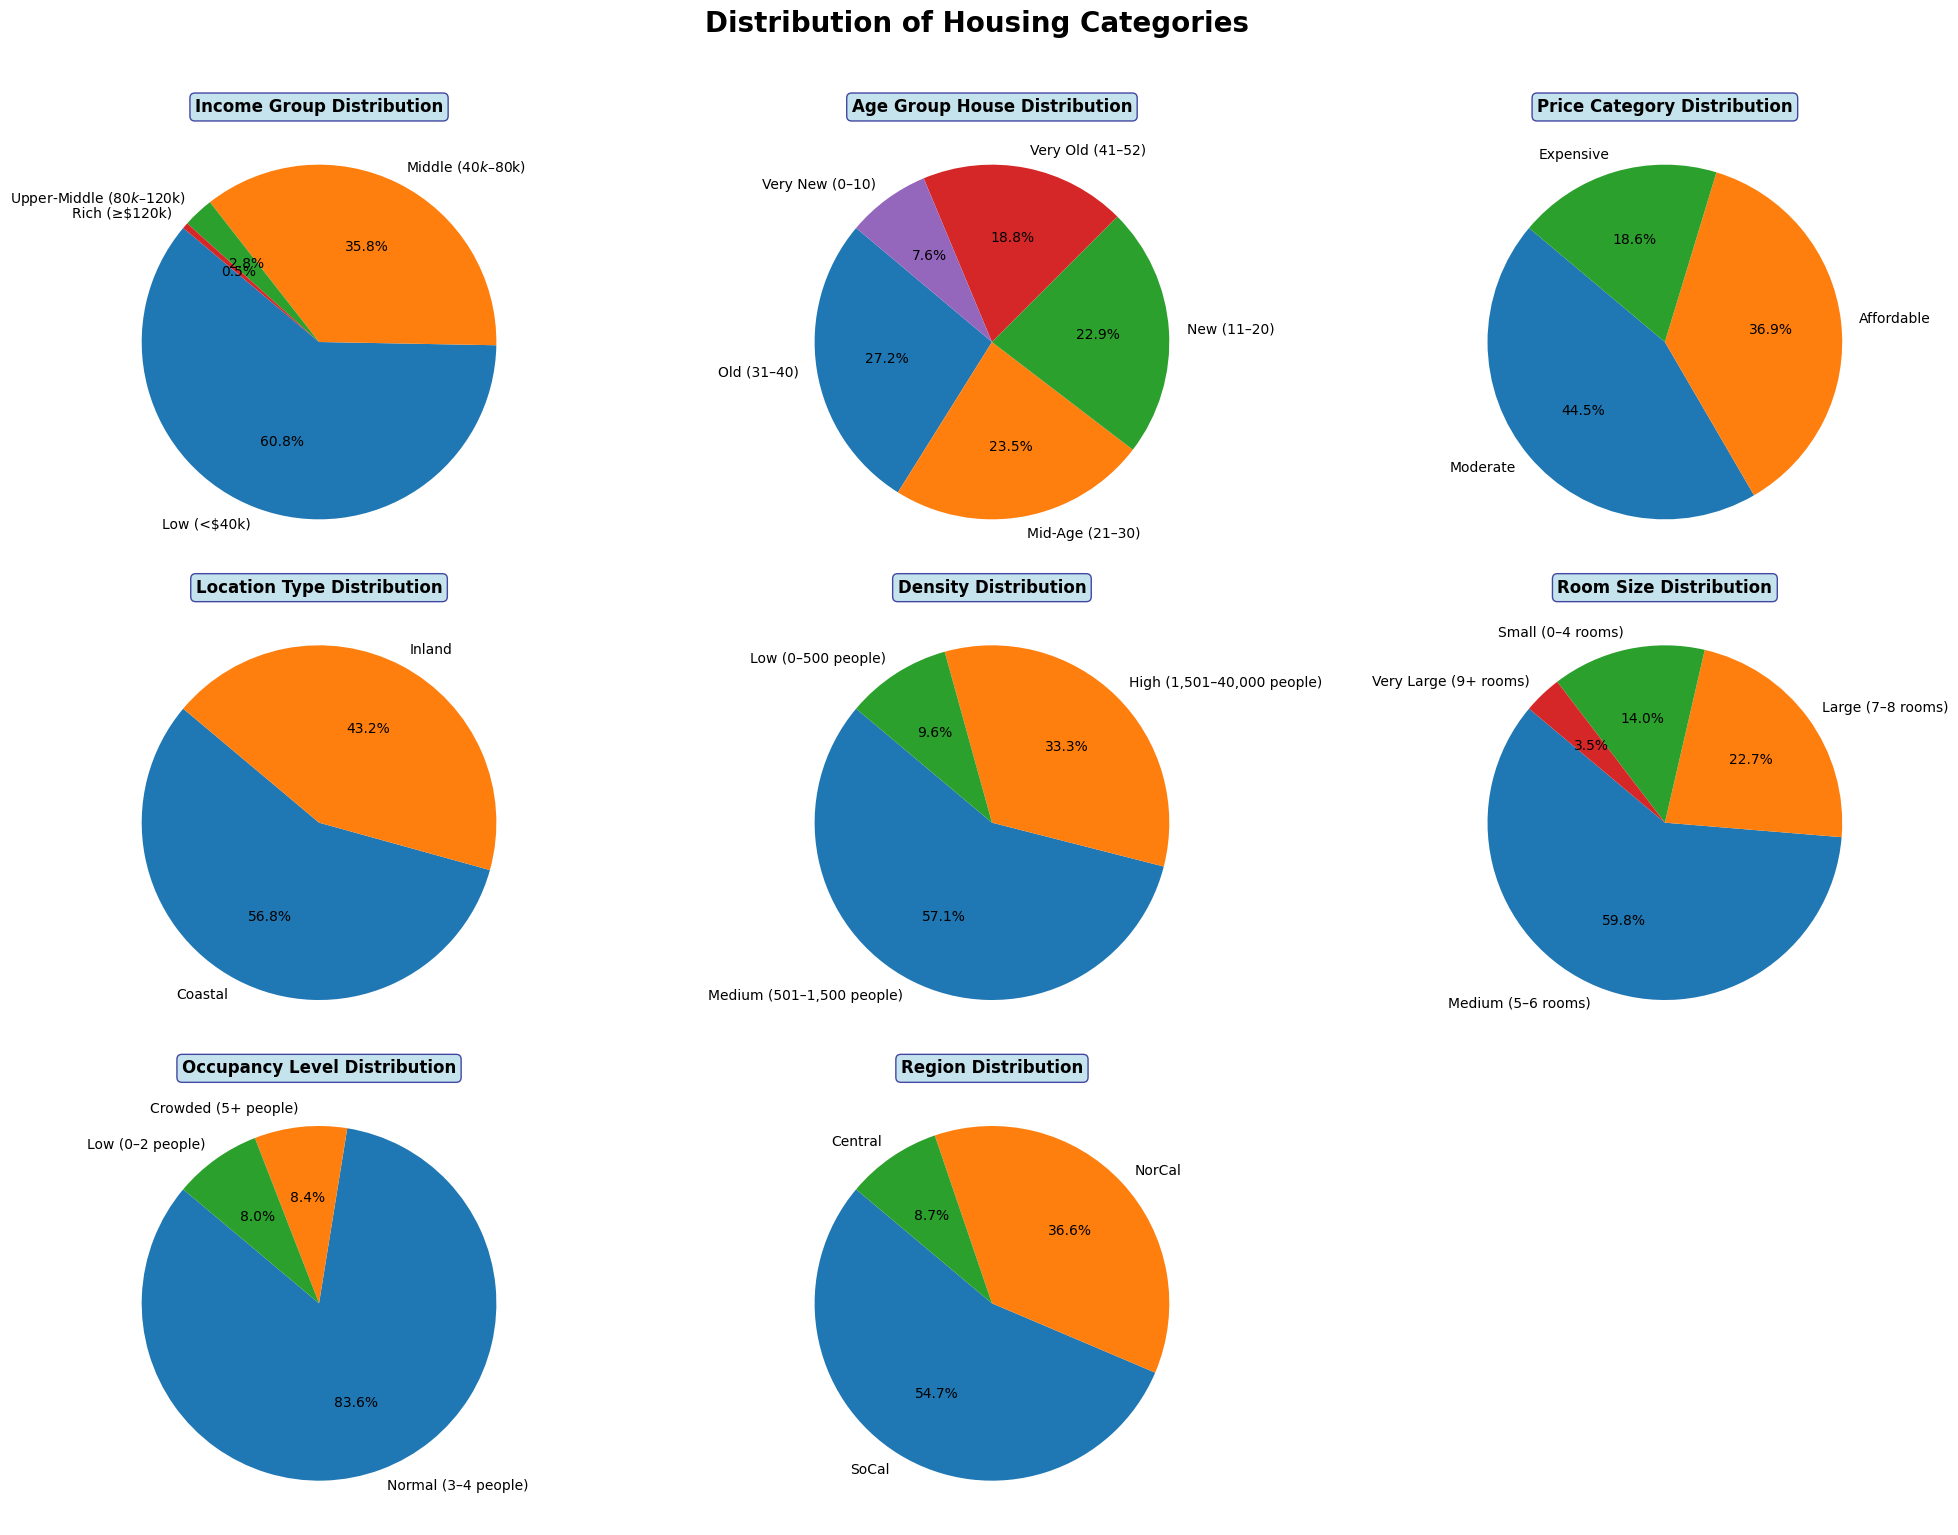

DETAILED BREAKDOWN BY CATEGORY

🔹 Income Group:
----------------------------------------
   Low (<$40k): 12,553 (60.8%)
   Middle ($40k–$80k): 7,397 (35.8%)
   Upper-Middle ($80k–$120k): 577 (2.8%)
   Rich (≥$120k): 113 (0.5%)

🔹 Age Group House:
----------------------------------------
   Old (31–40): 5,617 (27.2%)
   Mid-Age (21–30): 4,852 (23.5%)
   New (11–20): 4,724 (22.9%)
   Very Old (41–52): 3,878 (18.8%)
   Very New (0–10): 1,569 (7.6%)

🔹 Price Category:
----------------------------------------
   Moderate: 9,184 (44.5%)
   Affordable: 7,620 (36.9%)
   Expensive: 3,836 (18.6%)

🔹 Location Type:
----------------------------------------
   Coastal: 11,724 (56.8%)
   Inland: 8,916 (43.2%)

🔹 Density:
----------------------------------------
   Medium (501–1,500 people): 11,792 (57.1%)
   High (1,501–40,000 people): 6,868 (33.3%)
   Low (0–500 people): 1,980 (9.6%)

🔹 Room Size:
----------------------------------------
   Medium (5–6 rooms): 12,344 (59.8%)
   Large (7–8 rooms): 4

In [129]:
categorical_columns = [
    'income_group',
    'age_group_house',
    'price_category',
    'location_type',
    'density',
    'room_size',
    'occupancy_level',
    'region'
]

# Number of categories
n = len(categorical_columns)

# Determine number of rows and columns for subplot
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))

# Add main title for the entire figure
fig.suptitle('Distribution of Housing Categories', fontsize=20, fontweight='bold', y=1.02)

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    
    # Styled title with box effect
    axes[i].set_title(f'{col.replace("_", " ").title()} Distribution', 
                      fontsize=12, 
                      fontweight='bold',
                      bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', edgecolor='navy', alpha=0.7))

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print each data below the chart
print("=" * 60)
print("DETAILED BREAKDOWN BY CATEGORY")
print("=" * 60)

for col in categorical_columns:
    counts = df[col].value_counts()
    total = counts.sum()
    print(f"\n🔹 {col.replace('_', ' ').title()}:")
    print("-" * 40)
    for category, count in counts.items():
        pct = (count / total) * 100
        print(f"   {category}: {count:,} ({pct:.1f}%)")

# California Map: Coastal vs Inland Properties\n(Blue = Coastal, Orange = Inland)

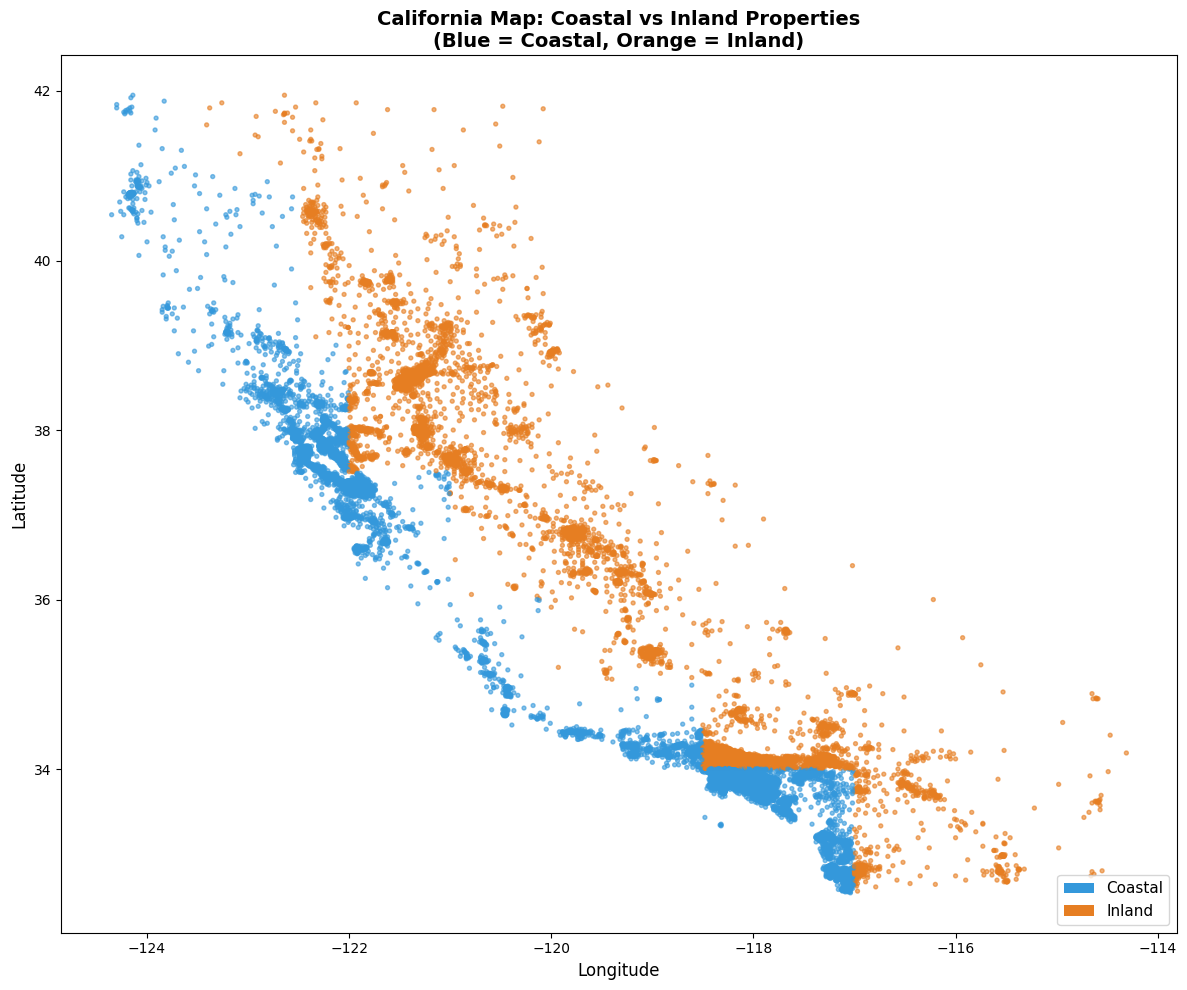


COASTAL vs INLAND BREAKDOWN:
   Coastal: 11,724 properties (56.8%)
   Inland: 8,916 properties (43.2%)


In [130]:
# MAP: Coastal vs Inland Distribution
fig, ax = plt.subplots(figsize=(12, 10))

# Create color map: Coastal = Blue, Inland = Orange
colors = df['location_type'].map({'Coastal': '#3498db', 'Inland': '#e67e22'})

scatter = ax.scatter(df['Longitude'], 
                     df['Latitude'],
                     c=colors,
                     alpha=0.6,
                     s=8)

ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title('California Map: Coastal vs Inland Properties\n(Blue = Coastal, Orange = Inland)', 
             fontsize=14, fontweight='bold')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#3498db', label='Coastal'),
                   Patch(facecolor='#e67e22', label='Inland')]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11)

plt.tight_layout()
plt.show()

print("\nCOASTAL vs INLAND BREAKDOWN:")
print("=" * 40)
counts = df['location_type'].value_counts()
total = len(df)
for loc_type, count in counts.items():
    pct = (count / total) * 100
    print(f"   {loc_type}: {count:,} properties ({pct:.1f}%)")

# Show Correlation between MedInc and House Value

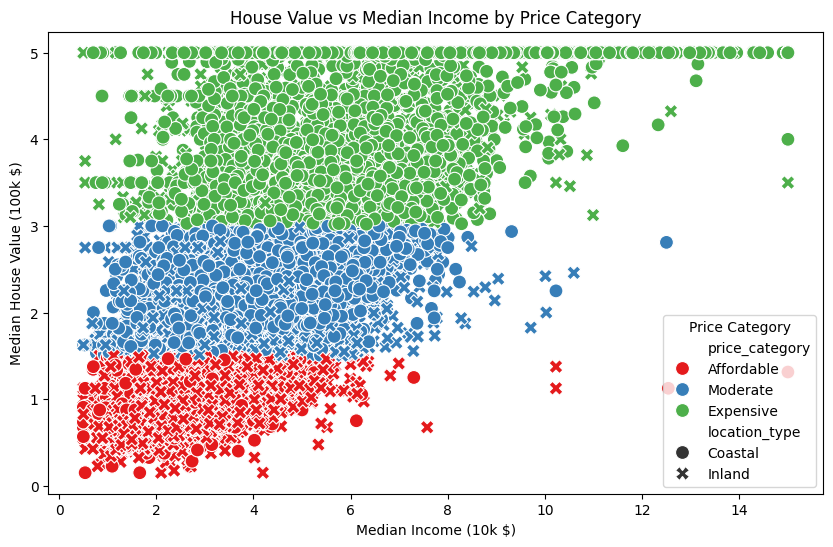

In [131]:


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='MedInc', 
    y='MedHouseVal', 
    hue='price_category', 
    style='location_type', 
    palette='Set1',        
    s=100                
)
plt.title('House Value vs Median Income by Price Category')
plt.xlabel('Median Income (10k $)')
plt.ylabel('Median House Value (100k $)')
plt.legend(title='Price Category')
plt.show()

# Correlation Between All Features\n(Closer to 1 = Strong Positive, Closer to -1 = Strong Negative

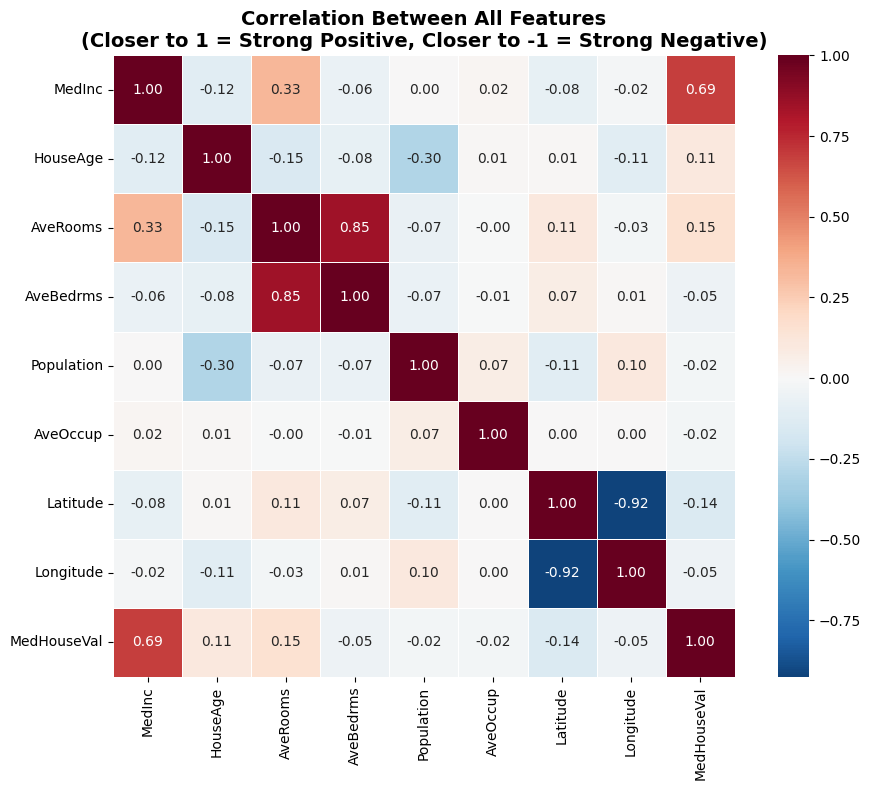

FACTORS RANKED BY IMPACT ON HOUSE VALUE:
   Strong MedInc: 0.69
   Moderate AveRooms: 0.15
   Moderate HouseAge: 0.11
   Weak AveOccup: -0.02
   Weak Population: -0.02
   Weak Longitude: -0.05
   Weak AveBedrms: -0.05
   Moderate Latitude: -0.14


In [132]:
fig, ax = plt.subplots(figsize=(10, 8))

# Select only numeric columns first
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            ax=ax)

ax.set_title('Correlation Between All Features\n(Closer to 1 = Strong Positive, Closer to -1 = Strong Negative)', 
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Get correlations with target
target_corr = corr_matrix['MedHouseVal'].drop('MedHouseVal').sort_values(ascending=False)

print("FACTORS RANKED BY IMPACT ON HOUSE VALUE:")
print("=" * 50)
for feature, corr in target_corr.items():
    if abs(corr) >= 0.3:
        impact = "Strong"
    elif abs(corr) >= 0.1:
        impact = "Moderate"
    else:
        impact = "Weak"
    print(f"   {impact} {feature}: {corr:.2f}")

# Check the california html for more visualization

In [133]:
# Create base map centered on California
m = folium.Map(location=[36.8, -119.5], zoom_start=6)

# Color mapping for location_type
color_map = {
    'Coastal': 'blue',
    'Inland': 'green'
}

# Plot points
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color=color_map.get(row['location_type'], 'gray'),
        fill=True,
        fill_opacity=0.6,
        popup=f"""
        Location: {row['location_type']}<br>
        Median House Value: {row['MedHouseVal']}
        """
    ).add_to(m)
m.save("california_map.html")